In [2]:
import numpy as np
import pandas as pd
import json
import os
import matplotlib.pyplot as plt 
import scipy.sparse
import matplotlib.patches as mpatches
import itertools
import random
import matplotlib.cm
import glob
from matplotlib import font_manager
from utils.lists import *
from matplotlib_venn import venn2, venn2_circles

# SD Fig. 5a Condition-specific peaks

In [24]:
arr = pd.read_csv('/home/ah2428/ShareZhangLab/PTSD/R2R/condition_specific_peaks.csv',sep='\t')

In [25]:
arr = arr.rename(columns={'Unnamed: 0':'names'})

In [26]:
names = arr.names.values

In [19]:
colors = list(itertools.chain(*[[celltype_colors[x]]*3 for x in ['EXC','INH','OLI','OPC','END','AST','MIC']]))
fc_colors = []
for a in [1,0.7,0.4,0.1]:
    for c in colors:
        fc_color = (np.append(list(matplotlib.colors.to_rgb(c)),a))
        fc_colors.append(fc_color)

In [28]:
arr = arr[['Intronic','Distal','Promoter','Exonic']]

In [29]:
arr = np.array(arr)
arr = arr/1e3
arr = pd.DataFrame(arr,index=names,columns=['Intronic','Distal','Promoter','Exonic'])

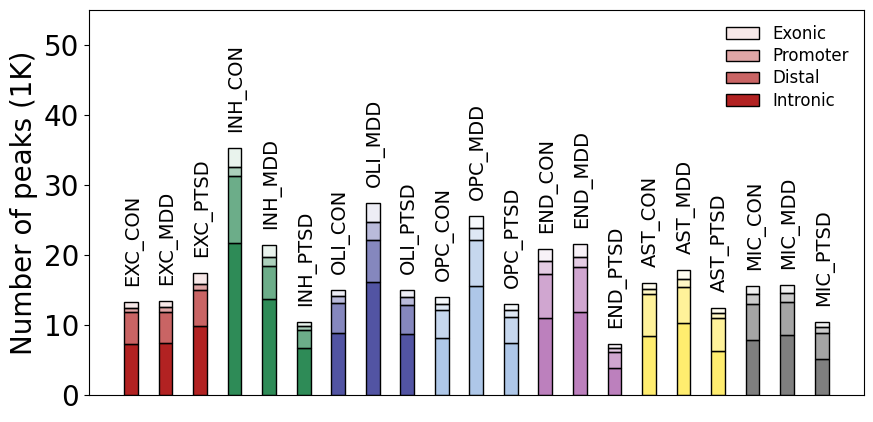

In [34]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.size']= '20'

plt.rcParams.update({'hatch.color': 'white'})

fig, ax = plt.subplots(figsize=(10,5))
ax.set_ylabel('Number of peaks (1K)')
ax.set_ylim([0,55])
ax.get_xaxis().set_visible(False)

ax.bar(names,arr.values[:,0],width=0.4,label='Intronic',color=fc_colors[:7*3],ec=(0,0,0,1))
ax.bar(names,arr.values[:,1],bottom=arr.values[:,0],width=0.4,label='Distal',color=fc_colors[7*3:14*3],ec=(0,0,0,1))
ax.bar(names,arr.values[:,2],bottom=arr.values[:,0]+arr.values[:,1],width=0.4,label='Promoter',color=fc_colors[14*3:21*3],ec=(0,0,0,1))
ax.bar(names,arr.values[:,3],bottom=arr.values[:,0]+arr.values[:,1]+arr.values[:,2],width=0.4,label='Exonic',color=fc_colors[21*3:],ec=(0,0,0,1))

handles, labels = plt.gca().get_legend_handles_labels()
order = [3,2,1,0]

for ii,c,y in zip(np.arange(21)-0.2,names,arr.sum(axis=1).values+3):
    ax.text(ii,y,c,fontsize=14,rotation=90)
            
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=12,frameon=False,bbox_to_anchor=(1,1),labelspacing=0.25) 

# SD Fig. 5b Condition-specific CREs 

In [35]:
cre = pd.read_csv('/home/ah2428/ShareZhangLab/PTSD/ATAC/data/ATAC_FINAL2/ConditionPeaks/condition_cres.csv',sep='\t')

In [36]:
num_cre = cre.shape[0]

In [37]:
cre = pd.DataFrame(cre.peakType.value_counts()).reset_index()

In [38]:
cre = cre.astype(str)

In [39]:
c='#b22222'
colors = []
for a in [1,0.7,0.1,0.4]:
    color = (np.append(list(matplotlib.colors.to_rgb(c)),a))
    colors.append(color)

Text(0.0, 0.0, '141939\nCREs')

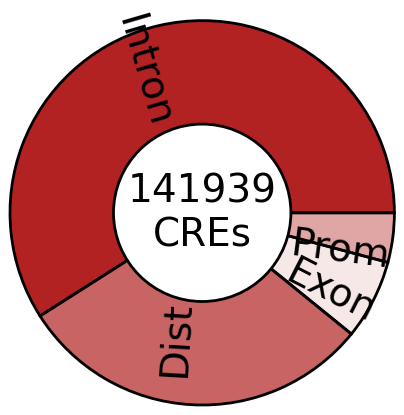

In [40]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.size'] = '28'

names = cre['peakType'].values
size = cre['count'].values
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.6, edgecolor='k', facecolor='white', linewidth=2)

# Custom wedges
fig, ax = plt.subplots()
pie, text = ax.pie(size, labels=['Intron','Dist','Exon','Prom'], wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'black' }, colors=colors, rotatelabels=True,labeldistance=0.45, radius=1.3)

p=plt.gcf()
p.gca().add_artist(my_circle)

ax.text(0., 0., str(num_cre)+'\nCREs', horizontalalignment='center', verticalalignment='center')

# SD Fig. 5c PTSD CLG-DEG

In [42]:
p2g = pd.read_csv('/home/ah2428/ShareZhangLab/PTSD/ATAC/data/ATAC_FINAL2/ConditionPeaks/condition_p2g.csv',sep='\t')

In [43]:
cre = p2g[p2g.Correlation > 0.4][p2g.FDR < 0.05]

/tmp/ipykernel_2315220/1228210194.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cre = p2g[p2g.Correlation > 0.4][p2g.FDR < 0.05]


In [44]:
condition_cres = pd.read_csv('/home/ah2428/palmer_scratch/supp_tables/Condition_CRE_metadata.csv',sep='\t')

In [45]:
condition_cres['chr'] = [x.split(':')[0] for x in condition_cres['CRE'].values]
condition_cres['start'] = [x.split(':')[1].split('-')[0] for x in condition_cres['CRE'].values]
condition_cres['end'] = [x.split(':')[1].split('-')[1] for x in condition_cres['CRE'].values]
condition_cres['peakName'] = condition_cres['chr']+'_'+condition_cres['start']+'_'+condition_cres['end']

In [8]:
condition_cres

,Unnamed: 0,CRE,Celltype_Condition,width,strand,score,replicateScoreQuantile,groupScoreQuantile,Reproducibility,GroupReplicate,...,peakType,distToTSS,nearestTSS,GC,idx,N,chr,start,end,peakName
0,0,chr1:794836-795336,OLG_MDD,501,*,3.49631,0.292,0.125,2,OLG_MDD._.MS0204LL,...,Distal,9285,uc057awx.1,0.4012,1,0,chr1,794836,795336,chr1_794836_795336
1,1,chr1:815361-815861,MG_MDD,501,*,4.55482,0.462,0.286,2,MG_MDD._.MS0143WW,...,Promoter,1759,uc031tlt.2,0.4192,2,0,chr1,815361,815861,chr1_815361_815861
2,2,chr1:816087-816587,MG_CON,501,*,9.65456,0.448,0.294,3,MG_CON._.MS0167UU,...,Promoter,1033,uc031tlt.2,0.2894,3,0,chr1,816087,816587,chr1_816087_816587
3,3,chr1:818569-819069,END_CON,501,*,7.29118,0.545,0.277,2,END_CON._.MS0191SS,...,Exonic,1447,uc031tlt.2,0.4930,6,0,chr1,818569,819069,chr1_818569_819069
4,4,chr1:844395-844895,END_CON,501,*,13.62690,0.744,0.569,2,END_CON._.MS0187OO,...,Intronic,6702,uc057axk.1,0.5190,8,0,chr1,844395,844895,chr1_844395_844895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141934,141934,chrX:155769944-155770444,OPC_MDD,501,*,3.02196,0.403,0.190,2,OPC_MDD._.MS0117WW,...,Distal,2381,uc004fnq.2,0.3852,10713,0,chrX,155769944,155770444,chrX_155769944_155770444
141935,141935,chrX:155801259-155801759,EXN_MDD,501,*,10.34350,0.681,0.559,2,EXN_MDD._.MS0111PP,...,Distal,33696,uc004fnq.2,0.3593,10714,0,chrX,155801259,155801759,chrX_155801259_155801759
141936,141936,chrX:155874515-155875015,EXN_CON,501,*,12.07690,0.680,0.570,3,EXN_CON._.MS0173AA,...,Distal,6527,uc004fnr.4,0.5649,10717,0,chrX,155874515,155875015,chrX_155874515_155875015
141937,141937,chrX:155891394-155891894,MG_MDD,501,*,4.73530,0.198,0.062,3,MG_MDD._.MS0101FF,...,Distal,10265,uc004fnt.4,0.4311,10720,0,chrX,155891394,155891894,chrX_155891394_155891894


In [54]:
deg = pd.read_csv('/home/ah2428/palmer_scratch/supp_tables/PTSD_DEG_MAST_and_Wilcox.csv',sep='\t')

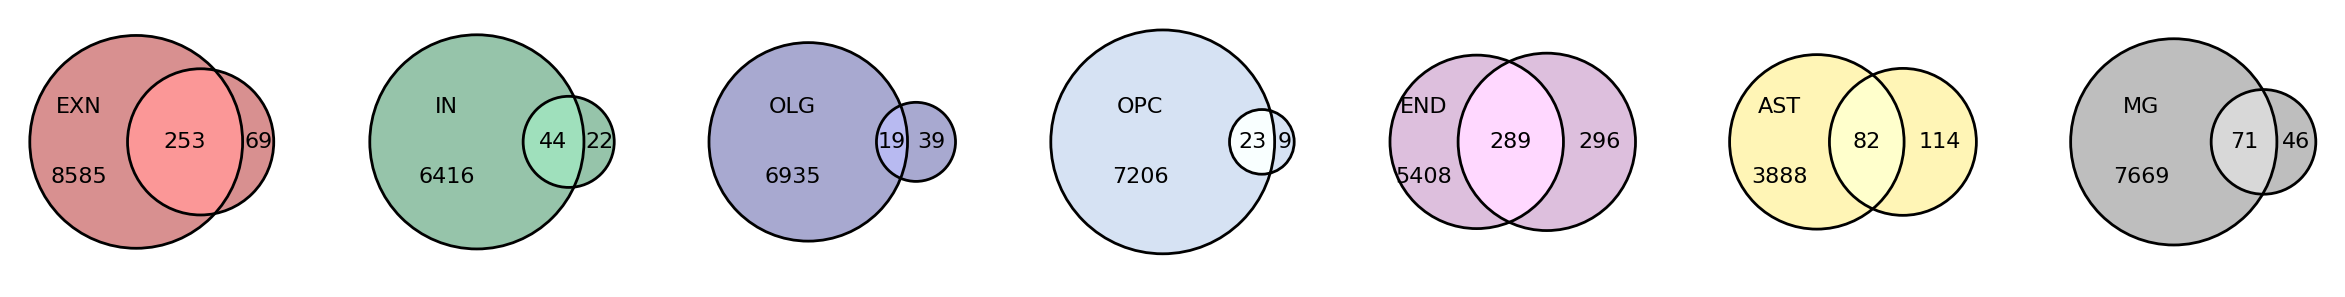

In [56]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.size'] = '16'

fig, ax = plt.subplots(1,7,figsize=(30,5))
ax = ax.flatten()

colors = list(celltype_colors2.values())

num_inters = []
ptsd_inters = []
for ii,cell in zip(np.arange(len(celltypes)),['EXN','IN','OLG','OPC','END','AST','MG']):
    cell_cres = condition_cres[condition_cres.Celltype_Condition==f'{cell}_PTSD'].peakName.values
    cell_p2g = cre[cre.peakName.isin(cell_cres)]
    clgs = cell_p2g.geneName.unique()
    degs = deg[deg['Celltype']==cell].Genename.values
    inter = list(set(clgs)&set(degs))
    ptsd_inters.append(inter)
    num_inters.append(len(inter))

    v = venn2(subsets = ( (len(clgs)-len(inter))*0.05, len(degs)-len(inter), len(inter)),
        set_colors=(colors[ii],colors[ii]),
        set_labels=(' ',' '),
        alpha=0.5,
        ax=ax[ii]
    )
    c = venn2_circles(subsets = ( (len(clgs)-len(inter))*0.05, len(degs)-len(inter), len(inter)),color='black',ax=ax[ii])

    v.get_label_by_id('10').set_text(str(len(clgs)-len(inter)))
    v.get_label_by_id('100').set_text(f'{cell}\n\n\n{len(clgs)-len(inter)}')

# SD Fig. 5d MDD CLG-DEG

In [57]:
deg = pd.read_csv('/home/ah2428/palmer_scratch/supp_tables/MDD_DEG_MAST_and_Wilcox.csv',sep='\t')

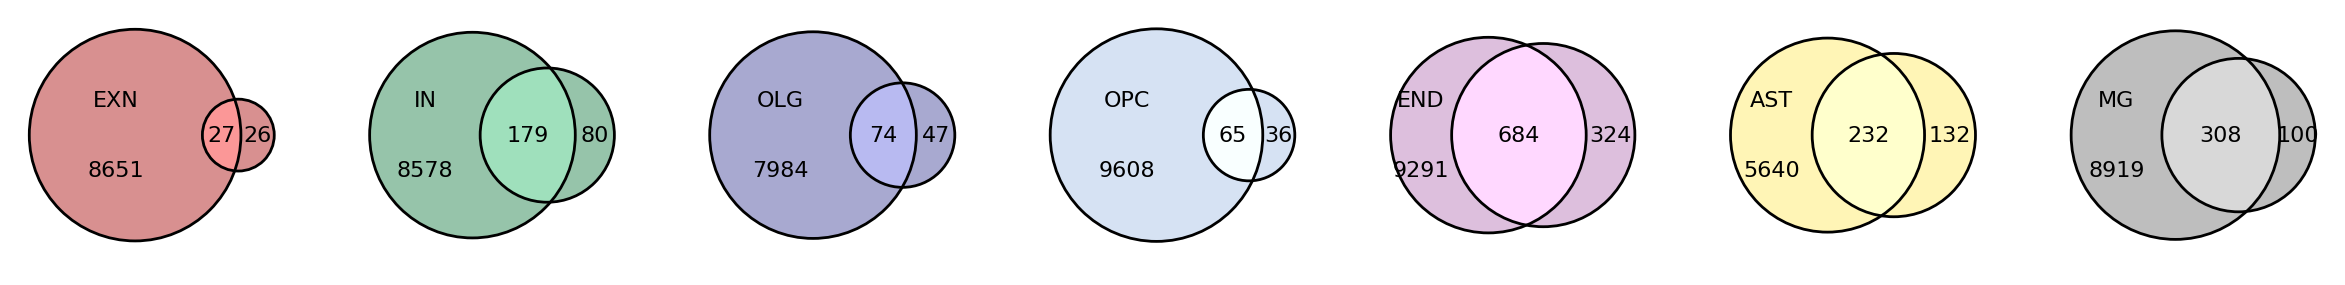

In [58]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.size'] = '16'

fig, ax = plt.subplots(1,7,figsize=(30,5))
ax = ax.flatten()

colors = list(celltype_colors2.values())

num_inters = []
mdd_inters = []
for ii,cell in zip(np.arange(len(celltypes)),['EXN','IN','OLG','OPC','END','AST','MG']):
    cell_cres = condition_cres[condition_cres.Celltype_Condition==f'{cell}_MDD'].peakName.values
    cell_p2g = cre[cre.peakName.isin(cell_cres)]
    clgs = cell_p2g.geneName.unique()
    degs = deg[deg['Celltype']==cell].Genename.values
    inter = list(set(clgs)&set(degs))
    mdd_inters.append(inter)
    num_inters.append(len(inter))

    v = venn2(subsets = ( (len(clgs)-len(inter))*0.05, len(degs)-len(inter), len(inter)),
        set_colors=(colors[ii],colors[ii]),
        set_labels=(' ',' '),
        alpha=0.5,
        ax=ax[ii]
    )
    c = venn2_circles(subsets = ( (len(clgs)-len(inter))*0.05, len(degs)-len(inter), len(inter)),color='black',ax=ax[ii])

    v.get_label_by_id('10').set_text(str(len(clgs)-len(inter)))
    v.get_label_by_id('100').set_text(f'{cell}\n\n\n{len(clgs)-len(inter)}')

# SD Fig. 5e PTSD CLG-DEG vs MDD CLG-DEG

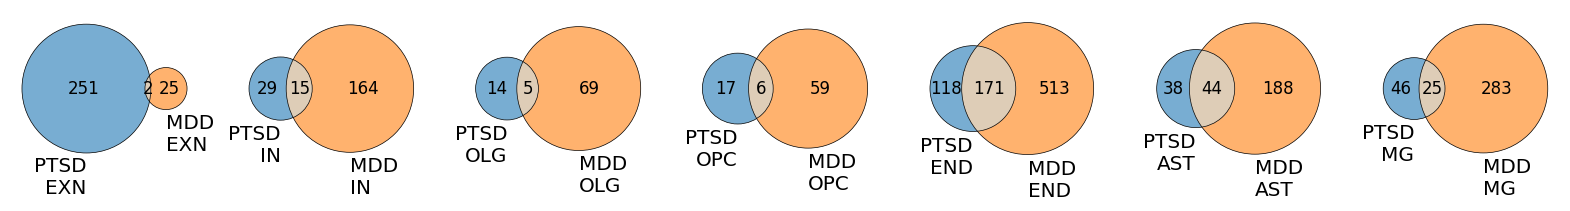

In [59]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.size']='12'

fig, ax = plt.subplots(1,7,figsize=(20,5))
ax = ax.flatten()
ptsd_specific_clgs = []
for i,celltype,celltype2 in zip(np.arange(7),['EXC','INH','OLI','OPC','END','AST','MIC'],['EXN','IN','OLG','OPC','END','AST','MG']):
    x = ptsd_inters[i]
    y = mdd_inters[i]
    inter = len(list(set(x) & set(y)))
    ptsd_specific = list(set(x)-set(list(set(x) & set(y))))
    ptsd_specific_clgs.append(ptsd_specific)
    venn2(subsets = (len(x)-inter, len(y)-inter, inter), set_labels = (f'PTSD\n{celltype2}', f'MDD\n{celltype2}'),set_colors=('tab:blue','tab:orange'),alpha=0.6,ax=ax[i])
    venn2_circles(subsets = (len(x)-inter, len(y)-inter, inter),linewidth=0.5,ax=ax[i])